# **Introduction**

Inspired by part 1 of the project, we try to find solutions to reduce food waste. In this domain, many researches are concerned with the allocation of the volunteers that collect the donated food or with optimizing the delivery of teh donated food. We try to solve the same problem from a different prespective, which is to reduce the amount of food wasted. In other words, we look for ways to limit food waste, so instead of this food going to waste, it can be donated. To achieve food waste reduction, we will try to minimize the food wasted at restaurants. Using a dataset for orders at a restaurant, we can predict the quantities needed for the ingredients. Instead of restaurants ordering bulks of ingredients, due to fear of their inability to serve their demand, and increasing the probability of the food being wasted, we will try to minimize the wasted food by predicting the quantities needed and ordering the ingredients according to the prediction. If the prediction was accurate enough, the amounts of wasted food should be at a minimum.

# **Descriptive Analytics**

## About The Dataset

The dataset we found is provided by Center for Machine Learning and Intelligent Systems at UCI. It contains data about the orders at a certain restaurant. The restaurant has many delivery centers and provides many meals. The data was collected across the period of 145 weeks. For more information about the dataset and its attributes information, check out this [link](https://archive.ics.uci.edu/ml/datasets/Demand+Forecasting+for+a+store).

## Data Importing

We will now begin by importing the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn import preprocessing
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.metrics import silhouette_score,silhouette_samples
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


If 'category_encoders' is not found, run the following cell, then rerun the previous one.

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 404 kB/s 


The following cell is just to make the figures of a certain size to guarantee consistency and readability.

In [ ]:
#make wider graphs
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

<Figure size 864x360 with 0 Axes>

First, let's start by importing the data. 

In [ ]:
center = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Hadeel Mabrouk - 900163213 /DIY Project/Dataset/fulfilment_center_info.csv")
meal = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Hadeel Mabrouk - 900163213 /DIY Project/Dataset/meal_info.csv")
data = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Hadeel Mabrouk - 900163213 /DIY Project/Dataset/train.csv")
# center = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Mohamed Barakat - 900171290/DIY Project/Dataset/fulfilment_center_info.csv")
# meal = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Mohamed Barakat - 900171290/DIY Project/Dataset/meal_info.csv")
# data = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Mohamed Barakat - 900171290/DIY Project/Dataset/train.csv")
# center = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Mohamed Elnaggar - 900170476/DIY Project/Dataset/fulfilment_center_info.csv")
# meal = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Mohamed Elnaggar - 900170476/DIY Project/Dataset/meal_info.csv")
# data = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Mohamed Elnaggar - 900170476/DIY Project/Dataset/train.csv")

There are 3 files:


1.   Meal Information
2.   Center Information
3.   Order (Demand) Information





In [ ]:
print("The Shape of Fulmilment Center Information dataset :",center.shape)
print("The Shape of Meal information dataset :",meal.shape)
print("The Shape of Demand dataset :",data.shape)

The Shape of Fulmilment Center Information dataset : (77, 5)
The Shape of Meal information dataset : (51, 3)
The Shape of Demand dataset : (456548, 9)


Let's take a look at the files. We will begin by the orders data. The features description is as follows:
* id: Unique ID
* week: Week No
* center_id: Unique ID for fulfillment center
* meal_id: Unique ID for Meal
* checkout_price: Final price including discount, taxes & delivery charges
* base_price: Base price of the meal
* emailer_for_promotion: Emailer sent for promotion of meal
* homepage_featured: Meal featured at homepage
* num_orders: (Target) Orders Count

In [ ]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


Next is data about the centers. The features description of the centers is as follows:
* center_id: Unique ID for fulfillment center
* city_code: Unique code for city
* region_code: Unique code for region
* center_type: Anonymized center type
* op_area: Area of operation (in km^2)

In [ ]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


Finally, data about the meals. Here's the description of the features:
* meal_id: Unique ID for the meal
* category: Type of meal (beverages/snacks/soupsâ€¦.)
* cuisine: Meal cuisine (Indian/Italian/â€¦)

In [ ]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


We will now merge the 3 files into one main dataset.

In [ ]:
data=data.merge(center,on='center_id',how='left')
data=data.merge(meal,on='meal_id',how='left')

In [ ]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


Let's add an extra column representing the sales of each meal for each center in a given week to give us more insights about the revenue of each center meal couple in every week. (NOTE: leakage variable)

In [ ]:
data['sales'] = data['checkout_price']*data['num_orders'] 

Now, the following step is just to add some extra challenges that are related to having some missing values in the dataset by randomly setting some base prices to be equal to null. This is just for the purpose of practicing the different techniques we learnt in class. However, in case of real life problems, we don't really do that.

In [ ]:
np.random.seed(0)
data['base_price'] = data['base_price'].mask(np.random.random(data.shape[0]) < .03)

## Basic Analytics

Let's have a quick look on details about the features.

In [ ]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,sales
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,442910.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,4.565480e+05
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.108021,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590,6.992205e+04
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.708027,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686,8.936335e+04
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000,4.158000e+01
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000,1.734464e+04
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000,4.177158e+04
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.840000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000,8.991860e+04
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000,3.865485e+06


Now let's check for missing values.

In [ ]:
data.isnull().sum()

id                           0
week                         0
center_id                    0
meal_id                      0
checkout_price               0
base_price               13638
emailer_for_promotion        0
homepage_featured            0
num_orders                   0
city_code                    0
region_code                  0
center_type                  0
op_area                      0
category                     0
cuisine                      0
sales                        0
dtype: int64

Missing values found for the base price feature. We will deal with them in the next section of Data Cleaning. Now let's check for duplicates.

In [ ]:
data.duplicated(['week','center_id','meal_id']).value_counts() #no duplicates

False    456548
dtype: int64

No duplicates were found.

## Data Cleaning

Let's look at the missing values in the base price feature.

In [ ]:
data.loc[(data['base_price'].isnull())]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales
16,1313873,1,55,2306,243.50,NaN,0,0,28,647,56,TYPE_C,2.0,Pasta,Italian,6818.00
34,1012104,1,24,1993,134.83,NaN,0,1,1243,614,85,TYPE_B,3.6,Beverages,Thai,167593.69
97,1199821,1,11,2826,338.53,NaN,0,0,458,679,56,TYPE_A,3.7,Sandwich,Italian,155046.74
99,1200664,1,11,1971,259.99,NaN,1,0,528,679,56,TYPE_A,3.7,Sandwich,Italian,137274.72
126,1227298,1,83,2707,190.12,NaN,0,0,473,659,77,TYPE_A,5.3,Beverages,Italian,89926.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456438,1439593,145,68,1754,291.03,NaN,0,0,458,676,34,TYPE_B,4.1,Sandwich,Italian,133291.74
456442,1230574,145,68,1558,511.19,NaN,0,0,95,676,34,TYPE_B,4.1,Pizza,Continental,48563.05
456472,1436708,145,51,1571,639.23,NaN,0,0,177,638,56,TYPE_A,7.0,Fish,Continental,113143.71
456518,1325626,145,61,2322,360.87,NaN,0,0,82,473,77,TYPE_A,4.5,Beverages,Continental,29591.34


We will now calculate the average prices of meals across the centers, and use these average values to fill in the missing values.

In [ ]:
meals_prices = data[['meal_id','center_id','base_price']].groupby(by=["meal_id", "center_id"], as_index=False).mean()
meals_prices #to impute the missing values with the ave"rage price for each meal at every center

,meal_id,center_id,base_price
0,1062,10,181.132774
1,1062,11,179.975175
2,1062,13,181.543022
3,1062,14,181.437571
4,1062,17,180.649231
...,...,...,...
3592,2956,152,602.530000
3593,2956,153,596.383544
3594,2956,157,599.664146
3595,2956,174,594.543590


Next, we fill in the missing values.

In [ ]:
# Fill missing values of base price with average values of the meal
for i, _ in meals_prices.iterrows():
  m = meals_prices.iloc[i]['meal_id']
  c = meals_prices.iloc[i]['center_id']
  v = meals_prices.iloc[i]['base_price']
  indices = data.loc[(data['base_price'].isnull())].loc[(data['meal_id'] == m)].loc[(data['center_id'] == c)].index
  data.loc[indices,['base_price']] = v

We make sure there is no missing values left.

In [ ]:
data.loc[(data['base_price'].isnull())]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales


Now, a quick check that the missing values were filled in with the correct value.

In [ ]:
meals_prices.loc[meals_prices['meal_id'] == 2707].loc[meals_prices['center_id'] == 83] #checking missing values imputation was applied correctly

,meal_id,center_id,base_price
3279,2707,83,221.862409


In [ ]:
data.iloc[126] #checking missing values imputation was applied correctly

id                         1227298
week                             1
center_id                       83
meal_id                       2707
checkout_price              190.12
base_price                 221.862
emailer_for_promotion            0
homepage_featured                0
num_orders                     473
city_code                      659
region_code                     77
center_type                 TYPE_A
op_area                        5.3
category                 Beverages
cuisine                    Italian
sales                      89926.8
Name: 126, dtype: object

## Data Exploration

### Numerical Data

We start by checking whether the base price is constant for a meal-center combination.

In [ ]:
data.loc[(data['center_id'] == 55)].loc[(data['meal_id'] == 1885)] #base prices are changing

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
2922,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,43873.09
5818,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,12760.32
8717,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,22145.18
11606,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,31497.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440172,1236628,141,55,1885,150.35,150.35,0,0,107,647,56,TYPE_C,2.0,Beverages,Thai,16087.45
443435,1436751,142,55,1885,148.47,148.47,0,0,121,647,56,TYPE_C,2.0,Beverages,Thai,17964.87
446673,1161827,143,55,1885,150.35,150.35,0,0,176,647,56,TYPE_C,2.0,Beverages,Thai,26461.60
449978,1292806,144,55,1885,150.35,152.35,0,0,162,647,56,TYPE_C,2.0,Beverages,Thai,24356.70


As can be seen, the base price changes for the meal-center combination. Let's take a look at its ditribution.

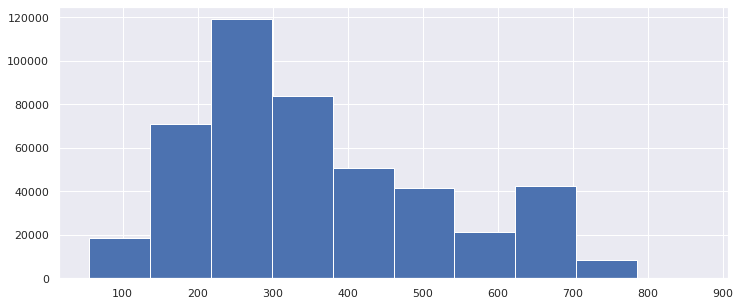

In [ ]:
data['base_price'].hist()

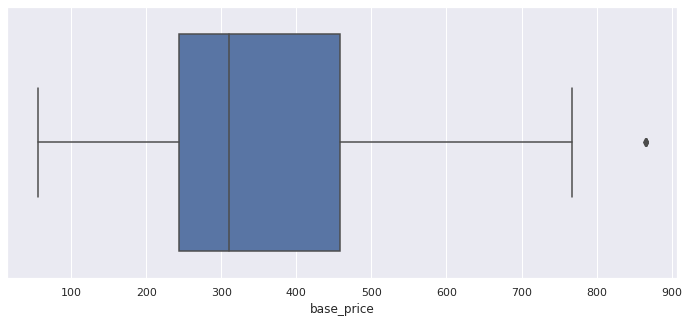

In [ ]:
ax = sns.boxplot(x=data['base_price'])

Let's take a look at the outliers.

In [ ]:
data.loc[(data['base_price'] > 800)] #outlier

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales
420865,1213267,135,93,1445,866.27,866.27,0,0,94,461,34,TYPE_A,3.9,Seafood,Continental,81429.38
427396,1245765,137,93,1445,765.33,865.27,0,0,53,461,34,TYPE_A,3.9,Seafood,Continental,40562.49
437235,1151530,140,93,1445,728.53,864.27,0,0,26,461,34,TYPE_A,3.9,Seafood,Continental,18941.78
440570,1454592,141,93,1445,727.53,865.27,0,0,26,461,34,TYPE_A,3.9,Seafood,Continental,18915.78
443826,1350293,142,93,1445,727.53,866.27,0,0,53,461,34,TYPE_A,3.9,Seafood,Continental,38559.09
447063,1071316,143,93,1445,583.03,866.27,0,1,40,461,34,TYPE_A,3.9,Seafood,Continental,23321.20
450375,1156247,144,93,1445,583.03,865.27,1,1,55,461,34,TYPE_A,3.9,Seafood,Continental,32066.65
453671,1092795,145,93,1445,727.53,865.27,0,0,41,461,34,TYPE_A,3.9,Seafood,Continental,29828.73


We now repeat the same steps but for the checkout prices instead of the base price. We start by looking at the distribution of the checkout price.

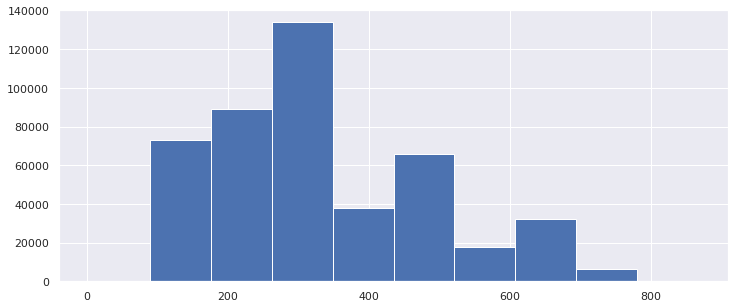

In [ ]:
data['checkout_price'].hist()

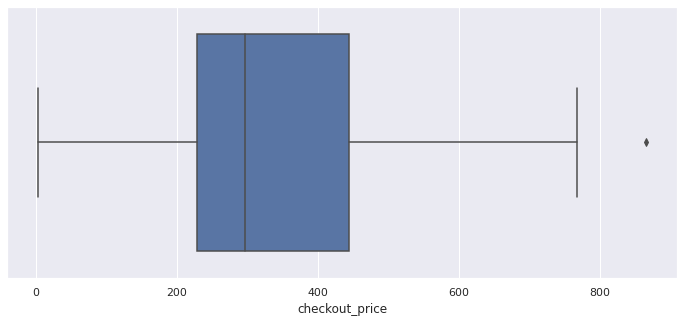

In [ ]:
ax = sns.boxplot(x=data['checkout_price'])

Now, we check for outliers.

In [ ]:
data.loc[(data['checkout_price'] > 800)] #outlier

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales
420865,1213267,135,93,1445,866.27,866.27,0,0,94,461,34,TYPE_A,3.9,Seafood,Continental,81429.38


In [ ]:
data.loc[(data['checkout_price'] < 65)] #outliers?

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales
44874,1414392,16,41,2631,47.59,253.23,0,0,163,590,56,TYPE_C,1.9,Beverages,Indian,7757.17
44875,1381921,16,41,1248,45.62,253.23,0,0,123,590,56,TYPE_C,1.9,Beverages,Indian,5611.26
55007,1149493,20,124,1803,55.35,191.09,0,0,163,590,56,TYPE_C,4.0,Extras,Thai,9022.05
60891,1456727,22,124,1198,64.02,256.11,0,0,69,590,56,TYPE_C,4.0,Extras,Thai,4417.38
72701,1324508,26,124,1803,55.35,212.43,0,0,81,590,56,TYPE_C,4.0,Extras,Thai,4483.35
110286,1300283,38,73,1230,2.97,316.25,0,0,14,576,34,TYPE_A,4.0,Beverages,Continental,41.58
157699,1345978,53,80,1803,55.35,55.35,0,0,82,604,56,TYPE_C,5.1,Extras,Thai,4538.70
173526,1017697,58,102,1109,56.26,319.13,0,0,229,593,77,TYPE_A,2.8,Rice Bowl,Indian,12883.54
238322,1486562,79,124,1311,64.02,213.43,0,0,69,590,56,TYPE_C,4.0,Extras,Thai,4417.38
319475,1237195,104,97,1248,64.02,65.02,0,0,13,628,77,TYPE_A,4.6,Beverages,Indian,832.26


Now, let's take a look at the distribution of the number of orders across the dataset.

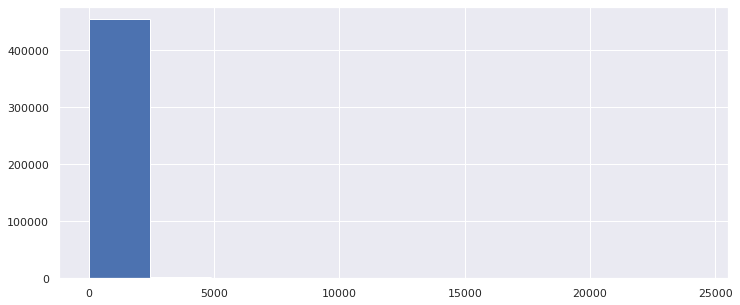

In [ ]:
data['num_orders'].hist()

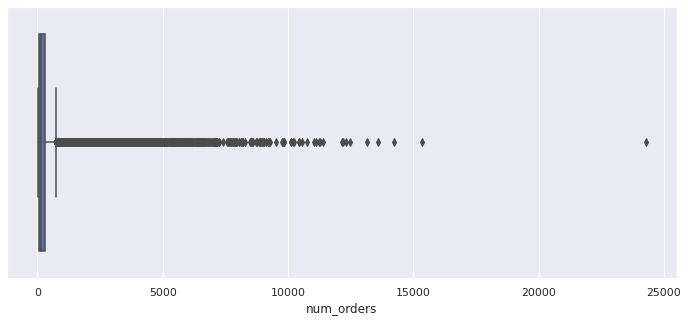

In [ ]:
ax = sns.boxplot(x=data['num_orders']) #there's an outlier at 24299

We now look for outliers.

In [ ]:
data.loc[(data['num_orders'] > 324+(324-54)*1.5)] #using info in the description cell

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales
10,1469367,1,55,1230,323.01,390.00,0,1,823,647,56,TYPE_C,2.0,Beverages,Continental,265837.23
11,1029333,1,55,2322,322.07,388.00,0,1,972,647,56,TYPE_C,2.0,Beverages,Continental,313052.04
14,1378227,1,55,1109,264.84,297.79,1,0,756,647,56,TYPE_C,2.0,Rice Bowl,Indian,200219.04
20,1044821,1,55,1971,259.99,320.13,1,1,798,647,56,TYPE_C,2.0,Sandwich,Italian,207472.02
33,1040403,1,24,1885,136.83,136.83,0,0,1498,614,85,TYPE_B,3.6,Beverages,Thai,204971.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456326,1022484,145,132,2664,239.59,338.56,0,1,755,522,56,TYPE_A,3.9,Salad,Italian,180890.45
456457,1017944,145,51,1885,159.14,158.14,0,0,1188,638,56,TYPE_A,7.0,Beverages,Thai,189058.32
456465,1054879,145,51,2707,227.01,227.01,0,0,755,638,56,TYPE_A,7.0,Beverages,Italian,171392.55
456471,1330807,145,51,1109,301.73,300.73,0,0,851,638,56,TYPE_A,7.0,Rice Bowl,Indian,256772.23


We take a closer look at the outlier with the maximum number of orders in the dataset. 

In [ ]:
data.loc[(data['num_orders'] == 24299)] #let's investigate this entry

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales
14050,1452474,5,43,2290,159.08,311.43,1,1,24299,590,56,TYPE_A,5.1,Rice Bowl,Indian,3865484.92


In [ ]:
data.loc[(data['center_id'] == 43)].loc[(data['meal_id'] == 2290)] #maybe we need to select a model that's robust against outliers

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales
2502,1364972,1,43,2290,279.39,279.390000,0,0,944,590,56,TYPE_A,5.1,Rice Bowl,Indian,263744.16
5406,1239891,2,43,2290,310.43,311.430000,0,0,1052,590,56,TYPE_A,5.1,Rice Bowl,Indian,326572.36
8305,1424249,3,43,2290,311.43,310.430000,0,0,1081,590,56,TYPE_A,5.1,Rice Bowl,Indian,336655.83
11193,1149814,4,43,2290,311.43,309.430000,0,0,1243,590,56,TYPE_A,5.1,Rice Bowl,Indian,387107.49
14050,1452474,5,43,2290,159.08,311.430000,1,1,24299,590,56,TYPE_A,5.1,Rice Bowl,Indian,3865484.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442968,1223085,141,43,2290,291.03,292.030000,0,0,2106,590,56,TYPE_A,5.1,Rice Bowl,Indian,612909.18
446210,1169959,142,43,2290,293.00,292.000000,0,0,1863,590,56,TYPE_A,5.1,Rice Bowl,Indian,545859.00
449506,1135619,143,43,2290,297.85,294.966861,0,0,2296,590,56,TYPE_A,5.1,Rice Bowl,Indian,683863.60
452810,1092567,144,43,2290,291.97,294.966861,0,0,2715,590,56,TYPE_A,5.1,Rice Bowl,Indian,792698.55


We now take a look at the number of orders for each category.

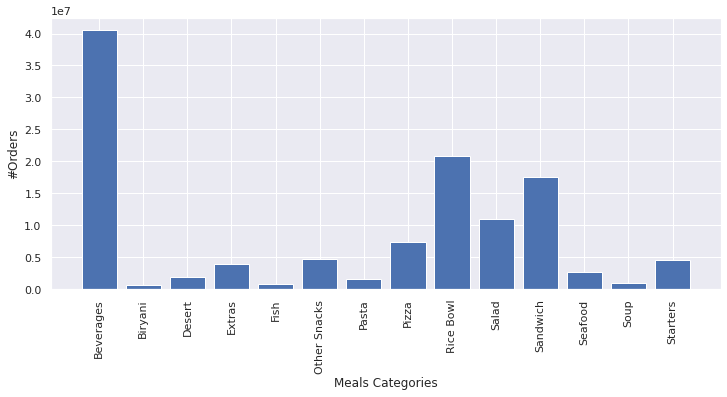

In [ ]:
orders_per_cat = data.groupby('category').num_orders.sum().reset_index()
plt.bar(x=orders_per_cat.category, height=orders_per_cat.num_orders, align='center')
plt.xticks(rotation='vertical')

plt.xlabel("Meals Categories")
plt.ylabel("#Orders")
plt.show()

Next is number of orders for each cuisine.

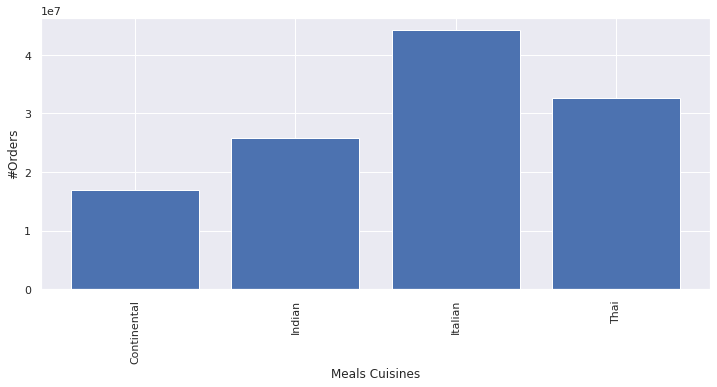

In [ ]:
orders_per_cus = data.groupby('cuisine').num_orders.sum().reset_index()
plt.bar(x=orders_per_cus.cuisine, height=orders_per_cus.num_orders, align='center')
plt.xticks(rotation='vertical')

plt.xlabel("Meals Cuisines")
plt.ylabel("#Orders")

plt.show()

Next is a quick look at the distribution of the operation area across the centers.

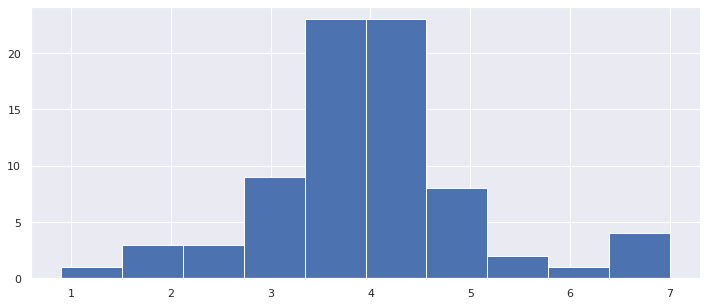

In [ ]:
center['op_area'].hist()

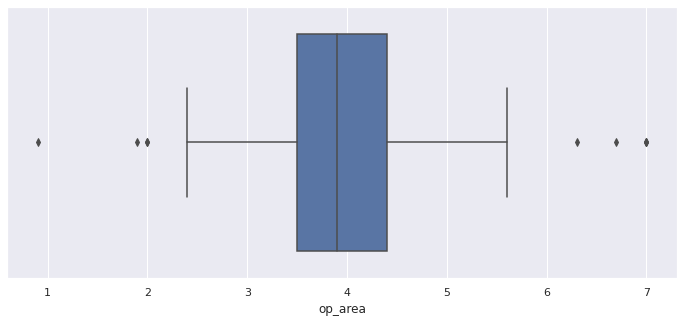

In [ ]:
ax = sns.boxplot(x=center['op_area'])

### Categorical Data

We now take a look at the categorical features in the dataset. We start by counting the number of meals for each meal category.

In [ ]:
meal['category'].value_counts()

Beverages       12
Biryani          3
Desert           3
Fish             3
Salad            3
Sandwich         3
Soup             3
Extras           3
Pizza            3
Starters         3
Rice Bowl        3
Pasta            3
Other Snacks     3
Seafood          3
Name: category, dtype: int64

Next, we count the number of meals for each cuisine.

In [ ]:
meal['cuisine'].value_counts()

Thai           15
Continental    12
Italian        12
Indian         12
Name: cuisine, dtype: int64

Let's compare the total number of orders for each cuisine.

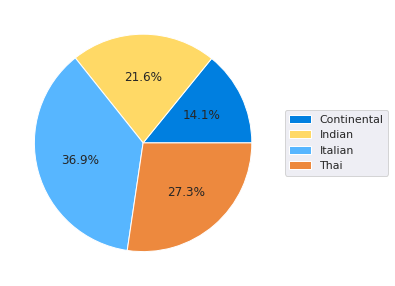

In [ ]:
cuisines = data.groupby(by=["cuisine"]).sum()['num_orders']
labels = cuisines.index.values.tolist()
plt.pie(cuisines,colors = ['#007fe0','#ffd966','#57b6ff','#ed893e'],autopct='%1.1f%%')
plt.legend(labels, loc='center left',bbox_to_anchor=(1.0, 0.5))

Next, we compare the total number of orders for each category.

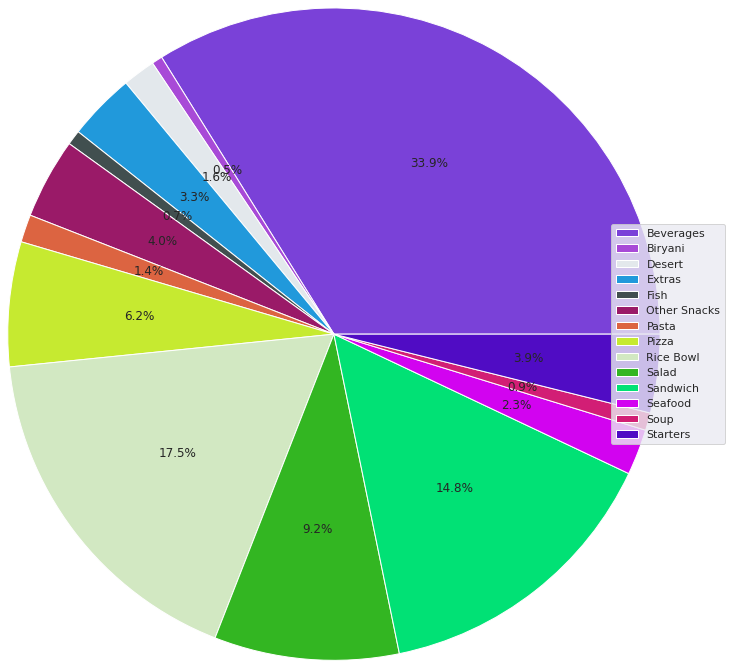

In [ ]:
categories = data.groupby(by=["category"]).sum()['num_orders']
labels = categories.index.values.tolist() 
cs=[]
for i in range (0,len(labels)):
  cs.append((np.random.random(), np.random.random(), np.random.random()))

plt.pie(categories,colors = cs,autopct='%1.1f%%',radius=1.5)
plt.legend(labels, loc='center left',bbox_to_anchor=(1.0, 0.5))



### Variations With Time

We will now take a look at how the features change through time (across the 145 weeks). We start by seeing how the checkout price of some meals at some centers changes with time. 

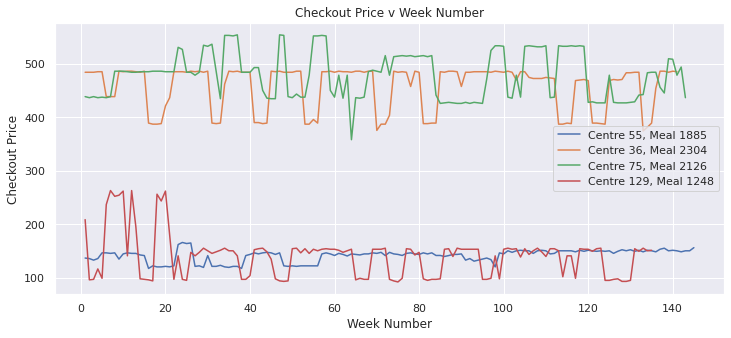

In [ ]:
prices1 = data.loc[(data['meal_id'] == 1885)].loc[(data['center_id'] == 55)]['checkout_price'].tolist()
plt.plot(range(1,len(prices1) + 1),prices1,label= 'Centre 55, Meal 1885')
prices2 = data.loc[(data['meal_id'] == 2304)].loc[(data['center_id'] == 36)]['checkout_price'].tolist()
plt.plot(range(1,len(prices2) + 1),prices2,label= 'Centre 36, Meal 2304')
prices3 = data.loc[(data['meal_id'] == 2126)].loc[(data['center_id'] == 75)]['checkout_price'].tolist()
plt.plot(range(1,len(prices3) + 1),prices3,label= 'Centre 75, Meal 2126')
prices4 = data.loc[(data['meal_id'] == 1248)].loc[(data['center_id'] == 129)]['checkout_price'].tolist()
plt.plot(range(1,len(prices4) + 1),prices4,label= 'Centre 129, Meal 1248')
plt.legend()
plt.title('Checkout Price v Week Number')
plt.xlabel('Week Number')
plt.ylabel('Checkout Price')
plt.show()

We now take a look at how the number of orders of some meals at some centers changes with time. 

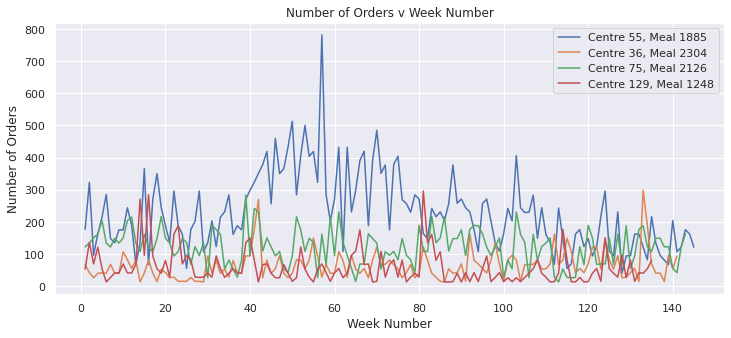

In [ ]:
orders1 = data.loc[(data['meal_id'] == 1885)].loc[(data['center_id'] == 55)]['num_orders'].tolist()
plt.plot(range(1,len(orders1) + 1),orders1,label= 'Centre 55, Meal 1885')
orders2 = data.loc[(data['meal_id'] == 2304)].loc[(data['center_id'] == 36)]['num_orders'].tolist()
plt.plot(range(1,len(orders2) + 1),orders2,label= 'Centre 36, Meal 2304')
orders3 = data.loc[(data['meal_id'] == 2126)].loc[(data['center_id'] == 75)]['num_orders'].tolist()
plt.plot(range(1,len(orders3) + 1),orders3,label= 'Centre 75, Meal 2126')
orders4 = data.loc[(data['meal_id'] == 1248)].loc[(data['center_id'] == 129)]['num_orders'].tolist()
plt.plot(range(1,len(orders4) + 1),orders4,label= 'Centre 129, Meal 1248')
plt.legend()
plt.title('Number of Orders v Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Orders')
plt.show()

Next, we take a look at how the total number of orders of some meals across all the centers changes with time.

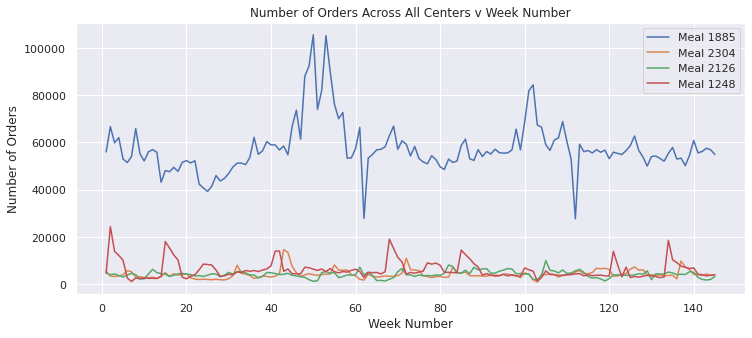

In [ ]:
meals = []
labels = []

meals.append(data.loc[(data['meal_id'] == 1885)])
labels.append('Meal 1885')
meals.append(data.loc[(data['meal_id'] == 2304)])
labels.append('Meal 2304')
meals.append(data.loc[(data['meal_id'] == 2126)])
labels.append('Meal 2126')
meals.append(data.loc[(data['meal_id'] == 1248)])
labels.append('Meal 1248')

for i in range(len(meals)):
  m = meals[i]
  orders = []
  for j in m['week'].unique():
    sum_orders_meal_week = m.loc[(data['week'] == j)]['num_orders'].sum()
    orders.append(sum_orders_meal_week)
  plt.plot(range(1,len(orders) + 1),orders,label= labels[i])
plt.legend()
plt.title('Number of Orders Across All Centers v Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Orders')
plt.show()

Next, we take a look at how the total number of orders at some centers across all the meals changes with time.

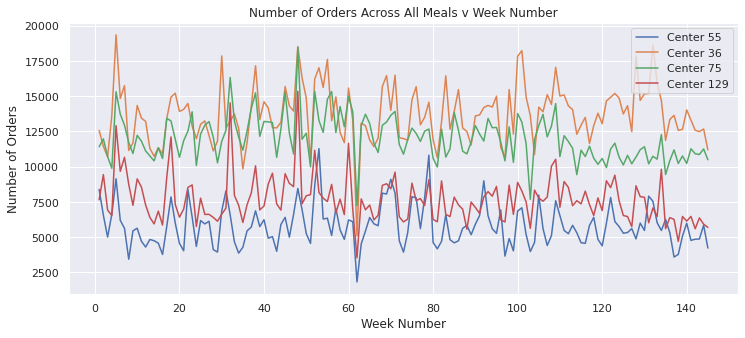

In [ ]:
centers = []
labels = []

centers.append(data.loc[(data['center_id'] == 55)])
labels.append('Center 55')
centers.append(data.loc[(data['center_id'] == 36)])
labels.append('Center 36')
centers.append(data.loc[(data['center_id'] == 75)])
labels.append('Center 75')
centers.append(data.loc[(data['center_id'] == 129)])
labels.append('Center 129')

for i in range(len(centers)):
  m = centers[i]
  orders = []
  for j in m['week'].unique():
    sum_orders_center_week = m.loc[(data['week'] == j)]['num_orders'].sum()
    orders.append(sum_orders_center_week)
  plt.plot(range(1,len(orders) + 1),orders,label= labels[i])
plt.legend()
plt.title('Number of Orders Across All Meals v Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Orders')
plt.show()

### Handling Outliers

As mentioned in the previous sections, we found some outliers. However, we decided to handle them during the predictive analytics phase because we wanted to try our models once with the outliers included in the dataset and another time with the outliers removed. Some predictive models are known to be robust to outliers so we wanted to try that.

## Feature Engineering

Before moving to the predictive analytics part, we first need to do some sort of feature engineering to help the model utilize the given data in the best possible way. Feature engineering is about baking and making new features out of the given feature where these new features are claimed to be more useful to the model, either through our domain knowledge or through some calculations.


### Variation Ratio Feature

First, we wanted to create a new variable out of the base and check out prices in the sense that it shall be the percentage of variation between the check out and base price. This percentage may be positive or negative depending on which is larger, the amount of taxes and delivery charges (added to the base price) or the amount of discount (subtracted from the base price).

In [ ]:
#add discount amount column
data['variation_ratio'] = (data['checkout_price'] - data['base_price'])/data['base_price']

As we can in the cell below, almost half of the data has a positive variation ratio, while the other half has a negative value.

In [ ]:
data.loc[(data['variation_ratio'] >=0)] #we may assign a lower bound of 0 assmuing that the column represents discount amount when the discount was significant

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sales,variation_ratio
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,36944.10,0.007362
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,9740.00,0.004124
8,1025244,1,55,2707,193.06,192.06,0,0,472,647,56,TYPE_C,2.0,Beverages,Italian,91124.32,0.005207
12,1446016,1,55,2290,311.43,310.43,0,0,162,647,56,TYPE_C,2.0,Rice Bowl,Indian,50451.66,0.003221
15,1181556,1,55,2640,282.33,281.33,0,0,108,647,56,TYPE_C,2.0,Starters,Thai,30491.64,0.003555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456541,1010438,145,61,2704,321.13,320.13,0,0,67,473,77,TYPE_A,4.5,Other Snacks,Thai,21515.71,0.003124
456542,1116711,145,61,2492,455.93,455.93,0,0,42,473,77,TYPE_A,4.5,Desert,Indian,19149.06,0.000000
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian,32918.12,0.000000
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian,20247.78,0.000000


### Meal Type Feature

Additionally, we thought of adding both the category and cuisine of the meal as one kind of interaction variable instead of dealing with each seperately. Interaction variables are the type of variables that represent the interaction between two or more categorical variable. For example, if we have 2 categorical variables, e.x. nationality and gender, we can create a new interaction variable presenting both the nationality and the gender, e.x. Egyptian Male, Egyptian Female, American Female, ..etc. 

In [ ]:
#create interaction variables for the meals, mixing cuisine and category
data["meal_type"] = data["category"] + "_" + data["cuisine"]

However, in our case, the meals type variable, which is the mix of the category and the cuisine of the meal is not a typical interaction variable. The reason behind this is that each cuisine has more or less a limited number of category. So as we can see from the cell below, mixing the two categories resulted in only 17 meal type instead of 14*4 types, because not all categories are present in all cuisines.

In [ ]:
data["meal_type"].value_counts()

Rice Bowl_Indian         33408
Beverages_Italian        33381
Sandwich_Italian         33291
Pizza_Continental        33138
Beverages_Thai           32659
Beverages_Continental    32554
Starters_Thai            29941
Other Snacks_Thai        29379
Beverages_Indian         29296
Desert_Indian            29294
Salad_Italian            28559
Pasta_Italian            27694
Seafood_Continental      26916
Biryani_Indian           20614
Extras_Thai              13562
Soup_Thai                12675
Fish_Continental         10187
Name: meal_type, dtype: int64

From the cell below and as we can see from the graph, we can notice that mixing the two variables together resulted in a fairly distributed sample across the categories.


In [ ]:
data.groupby(by=["meal_type"]).sum()['num_orders']

meal_type
Beverages_Continental     5943046
Beverages_Indian          2345879
Beverages_Italian        13953970
Beverages_Thai           18237630
Biryani_Indian             631848
Desert_Indian             1940754
Extras_Thai               3984979
Fish_Continental           871959
Other Snacks_Thai         4766293
Pasta_Italian             1637744
Pizza_Continental         7383720
Rice Bowl_Indian         20874063
Salad_Italian            10944336
Sandwich_Italian         17636782
Seafood_Continental       2715714
Soup_Thai                 1039646
Starters_Thai             4649122
Name: num_orders, dtype: int64

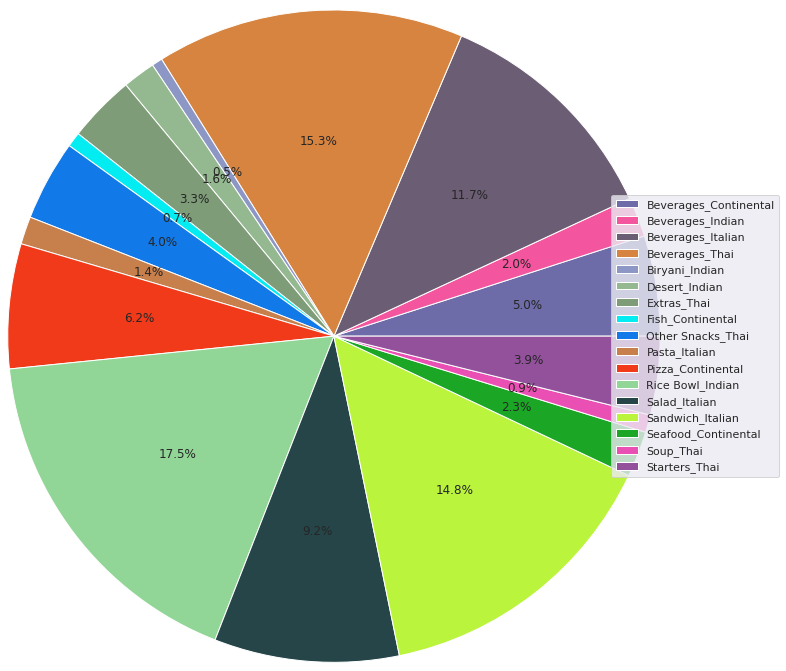

In [ ]:
types = data.groupby(by=["meal_type"]).sum()['num_orders']
labels = types.index.values.tolist() 
cs=[]
for i in range (0,len(labels)):
  cs.append((np.random.random(), np.random.random(), np.random.random()))

plt.pie(types,autopct='%1.1f%%',colors=cs, radius=1.5)
plt.legend(labels, loc='center left',bbox_to_anchor=(1.0, 0.5))

#todo: fix the colors and readability

### Encoding Categorical Variables

 With respect to the categorical variables, we first need to encode them into numerical values before feeding them to the model. One of the most popular methods to deal with categorical data is one-hot encoding, where we can create a number of columns that's equal to the categories and assign a binary value of 1 or 0 depending on whether or not a certain data entry is of a certain category. However, when the number of categories/level is too large, this method becomes rather infeasible. As we can see from the cells below, we have a total of 51 cities, 8 regions, and 3 center types. Thus, applying one-hot encoding to all of them shall result in 59 additionall columns. 

In [ ]:
center['city_code'].value_counts().count()

51

In [ ]:
center['region_code'].value_counts().count()

8

In [ ]:
center['center_type'].value_counts().count()

3

In [ ]:
center.duplicated(['city_code','region_code','center_type','op_area']).value_counts() #no duplicates

False    77
dtype: int64

Alternatively, we decided to encode them using a binary encoder instead, where the binary encoded uses the ceiling of log2(#categories) instead, resulting in majorly decreasing the number of added columns while guaranting no inherent order, unlike ordinal encoding (assigning numbers for each category).

In [ ]:
#reference: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/ 

#Create object for binary encoding
encoder = ce.BinaryEncoder(cols=['city_code','region_code','center_type'],return_df=True)
data_encoded = encoder.fit_transform(data) 
data_encoded

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_0,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,category,cuisine,sales,variation_ratio,meal_type
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,0,0,0,0,1,0,0,0,1,0,1,2.0,Beverages,Thai,24218.91,-0.101517,Beverages_Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,0,0,0,0,0,1,0,0,0,1,0,1,2.0,Beverages,Thai,36944.10,0.007362,Beverages_Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,0,0,0,0,0,1,0,0,0,1,0,1,2.0,Beverages,Thai,25488.54,-0.007361,Beverages_Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,0,0,0,0,0,1,0,0,0,1,0,1,2.0,Beverages,Indian,18333.00,-0.224053,Beverages_Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,0,0,0,0,0,1,0,0,0,1,0,1,2.0,Beverages,Indian,9740.00,0.004124,Beverages_Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,1,1,0,0,1,1,0,0,1,1,1,1,4.5,Desert,Indian,32918.12,0.000000,Desert_Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,1,1,0,0,1,1,0,0,1,1,1,1,4.5,Desert,Indian,20247.78,0.000000,Desert_Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,1,1,0,0,1,1,0,0,1,1,1,1,4.5,Salad,Italian,119077.68,-0.259725,Salad_Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,1,1,0,0,1,1,0,0,1,1,1,1,4.5,Salad,Italian,177511.50,-0.222889,Salad_Italian


Additionally, we will drop the column named 'region_code_0' since it can be interpretted from the other 3 columns which is mainly when the three other columns are equal to 0, as shown in the coming cell.

In [ ]:
data_encoded.loc[(data_encoded['region_code_1'] == 0)].loc[(data_encoded['region_code_2'] == 0)].loc[(data_encoded['region_code_3'] == 0)]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_0,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,category,cuisine,sales,variation_ratio,meal_type
2719,1111451,1,23,1885,135.83,134.830000,0,1,972,1,1,0,0,1,0,1,0,0,0,1,1,3.4,Beverages,Thai,132026.76,0.007417,Beverages_Thai
2720,1022379,1,23,1993,134.83,134.830000,0,0,648,1,1,0,0,1,0,1,0,0,0,1,1,3.4,Beverages,Thai,87369.84,0.000000,Beverages_Thai
2721,1261612,1,23,2539,136.83,135.830000,0,0,189,1,1,0,0,1,0,1,0,0,0,1,1,3.4,Beverages,Thai,25860.87,0.007362,Beverages_Thai
2722,1052060,1,23,2139,341.50,437.530000,0,0,68,1,1,0,0,1,0,1,0,0,0,1,1,3.4,Beverages,Indian,23222.00,-0.219482,Beverages_Indian
2723,1007929,1,23,2631,252.23,251.230000,0,0,40,1,1,0,0,1,0,1,0,0,0,1,1,3.4,Beverages,Indian,10089.20,0.003980,Beverages_Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456368,1060118,145,23,1543,485.03,486.030000,0,0,94,1,1,0,0,1,0,1,0,0,0,1,1,3.4,Desert,Indian,45592.82,-0.002057,Desert_Indian
456369,1125177,145,23,2304,485.03,486.030000,0,0,27,1,1,0,0,1,0,1,0,0,0,1,1,3.4,Desert,Indian,13095.81,-0.002057,Desert_Indian
456370,1358610,145,23,2664,241.53,322.070000,0,0,243,1,1,0,0,1,0,1,0,0,0,1,1,3.4,Salad,Italian,58691.79,-0.250070,Salad_Italian
456371,1404779,145,23,2569,242.53,318.803391,0,0,310,1,1,0,0,1,0,1,0,0,0,1,1,3.4,Salad,Italian,75184.30,-0.239249,Salad_Italian


In [ ]:
data_encoded = data_encoded.drop(['region_code_0'], axis=1)
data_encoded

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,category,cuisine,sales,variation_ratio,meal_type
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Thai,24218.91,-0.101517,Beverages_Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Thai,36944.10,0.007362,Beverages_Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Thai,25488.54,-0.007361,Beverages_Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Indian,18333.00,-0.224053,Beverages_Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Indian,9740.00,0.004124,Beverages_Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,1,1,0,0,1,1,0,1,1,1,1,4.5,Desert,Indian,32918.12,0.000000,Desert_Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,1,1,0,0,1,1,0,1,1,1,1,4.5,Desert,Indian,20247.78,0.000000,Desert_Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,1,1,0,0,1,1,0,1,1,1,1,4.5,Salad,Italian,119077.68,-0.259725,Salad_Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,1,1,0,0,1,1,0,1,1,1,1,4.5,Salad,Italian,177511.50,-0.222889,Salad_Italian


Similar to the center data, we also want to encode the meal types. However, this time we will use one-hot encoding given that the total number of categories is only 14, fairly small compared to the data size.


In [ ]:
meal_type_encoded=pd.get_dummies(data=data_encoded["meal_type"],drop_first=True)
meal_type_encoded

,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Finally, let's concatenate the data together.

In [ ]:
data_encoded = pd.concat([data_encoded, meal_type_encoded], axis=1)
data_encoded

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,category,cuisine,sales,variation_ratio,meal_type,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Thai,24218.91,-0.101517,Beverages_Thai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1466964,1,55,1993,136.83,135.83,0,0,270,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Thai,36944.10,0.007362,Beverages_Thai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Thai,25488.54,-0.007361,Beverages_Thai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1338232,1,55,2139,339.50,437.53,0,0,54,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Indian,18333.00,-0.224053,Beverages_Indian,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,0,0,0,0,0,1,0,0,1,0,1,2.0,Beverages,Indian,9740.00,0.004124,Beverages_Indian,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,1,1,0,0,1,1,0,1,1,1,1,4.5,Desert,Indian,32918.12,0.000000,Desert_Indian,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,1062036,145,61,2304,482.09,482.09,0,0,42,1,1,0,0,1,1,0,1,1,1,1,4.5,Desert,Indian,20247.78,0.000000,Desert_Indian,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,1,1,0,0,1,1,0,1,1,1,1,4.5,Salad,Italian,119077.68,-0.259725,Salad_Italian,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,1147725,145,61,2569,243.50,313.34,0,0,729,1,1,0,0,1,1,0,1,1,1,1,4.5,Salad,Italian,177511.50,-0.222889,Salad_Italian,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Now that we already encoded the needed categorical variables associated to the meals, we shall drop them from the encoded data dataframe.


In [ ]:
data_encoded=data_encoded.drop(['category','cuisine','meal_type'], axis=1) #encoded
data_encoded

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,sales,variation_ratio,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,0,0,0,0,1,0,0,1,0,1,2.0,24218.91,-0.101517,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1466964,1,55,1993,136.83,135.83,0,0,270,0,0,0,0,0,1,0,0,1,0,1,2.0,36944.10,0.007362,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,0,0,0,0,0,1,0,0,1,0,1,2.0,25488.54,-0.007361,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1338232,1,55,2139,339.50,437.53,0,0,54,0,0,0,0,0,1,0,0,1,0,1,2.0,18333.00,-0.224053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,0,0,0,0,0,1,0,0,1,0,1,2.0,9740.00,0.004124,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,1,1,0,0,1,1,0,1,1,1,1,4.5,32918.12,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,1062036,145,61,2304,482.09,482.09,0,0,42,1,1,0,0,1,1,0,1,1,1,1,4.5,20247.78,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,1,1,0,0,1,1,0,1,1,1,1,4.5,119077.68,-0.259725,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,1147725,145,61,2569,243.50,313.34,0,0,729,1,1,0,0,1,1,0,1,1,1,1,4.5,177511.50,-0.222889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Also, you need to be wary of leaking variables before moving forward! Simply put, leakage variables are columns in the data that can tell us about the response variable while it shouldn't be the case, meaning that it can be part of the training data because it used the response variable in its calculation. However, if we don't know already the response variable we will not be able to calculate it. 

In our case, we initially created a column named 'sales' which reflects the #orders (our response variable) multiplied by the check out price. Accordingly, before moving to the training stage, we need to eliminate that variable because it can create a false indication that the model is performing well, while in fact it's performing well because it has an extra piece of information that it shouldn't have.

In [ ]:
data_encoded=data_encoded.drop(['sales'], axis=1) #leakage_variable
data_encoded

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,variation_ratio,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,0,0,0,0,1,0,0,1,0,1,2.0,-0.101517,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1466964,1,55,1993,136.83,135.83,0,0,270,0,0,0,0,0,1,0,0,1,0,1,2.0,0.007362,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1346989,1,55,2539,134.86,135.86,0,0,189,0,0,0,0,0,1,0,0,1,0,1,2.0,-0.007361,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1338232,1,55,2139,339.50,437.53,0,0,54,0,0,0,0,0,1,0,0,1,0,1,2.0,-0.224053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,0,0,0,0,0,1,0,0,1,0,1,2.0,0.004124,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,1,1,0,0,1,1,0,1,1,1,1,4.5,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,1062036,145,61,2304,482.09,482.09,0,0,42,1,1,0,0,1,1,0,1,1,1,1,4.5,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0,501,1,1,0,0,1,1,0,1,1,1,1,4.5,-0.259725,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,1147725,145,61,2569,243.50,313.34,0,0,729,1,1,0,0,1,1,0,1,1,1,1,4.5,-0.222889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Finally, we will drop the ID's columns since we don't really need them at this stage.



In [ ]:
data_encoded=data_encoded.drop(['id','center_id','meal_id'], axis=1) #id's
data_encoded

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,variation_ratio,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
0,1,136.83,152.29,0,0,177,0,0,0,0,0,1,0,0,1,0,1,2.0,-0.101517,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,136.83,135.83,0,0,270,0,0,0,0,0,1,0,0,1,0,1,2.0,0.007362,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,134.86,135.86,0,0,189,0,0,0,0,0,1,0,0,1,0,1,2.0,-0.007361,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,339.50,437.53,0,0,54,0,0,0,0,0,1,0,0,1,0,1,2.0,-0.224053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,243.50,242.50,0,0,40,0,0,0,0,0,1,0,0,1,0,1,2.0,0.004124,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,484.09,484.09,0,0,68,1,1,0,0,1,1,0,1,1,1,1,4.5,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,145,482.09,482.09,0,0,42,1,1,0,0,1,1,0,1,1,1,1,4.5,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,145,237.68,321.07,0,0,501,1,1,0,0,1,1,0,1,1,1,1,4.5,-0.259725,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,145,243.50,313.34,0,0,729,1,1,0,0,1,1,0,1,1,1,1,4.5,-0.222889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Linear Correlations Investigations and Data Splitting

Now that our dataset is ready, we can start working on the predictive anayltics part, namely predicting the number of order in a week for a certain meal in a specific center given data about the meal and the center, such as the following:
* Meal cuisine and category
* Center city and region codes plus its type and area of operation in (km^2)
* The check out price and variation ratio
* Whether or not an email was sent regarding the promotion of the meal
* Whether or not the meal was featured at homepage


But before proceeding, we first need to learn more about the linear correlations between the attributes and their correlations with the response variable, namely the number of orders. This procedure can help us better learn more about the most important features, which are the ones that are highly correlated to the response variable. Also, it can help figure if there are two attributes that are highly correlated. In case of highly correlated attributes, one of them needs to be eliminated before proceeding to avoid collinearity issues. Additionally, it might help us figure out leakage variables if we haven't already figured them out.

One of the easiest ways to visualize such correlations is through correlation heatmaps, which is simply a tool that shows a 2D correlation matrix between the variables using a color range to represent the level of collinearity. From the following plot, we can notice that the attributes are fairly correlated except for the correlation between the base and checkout prices, which makes sense given their meaning. 

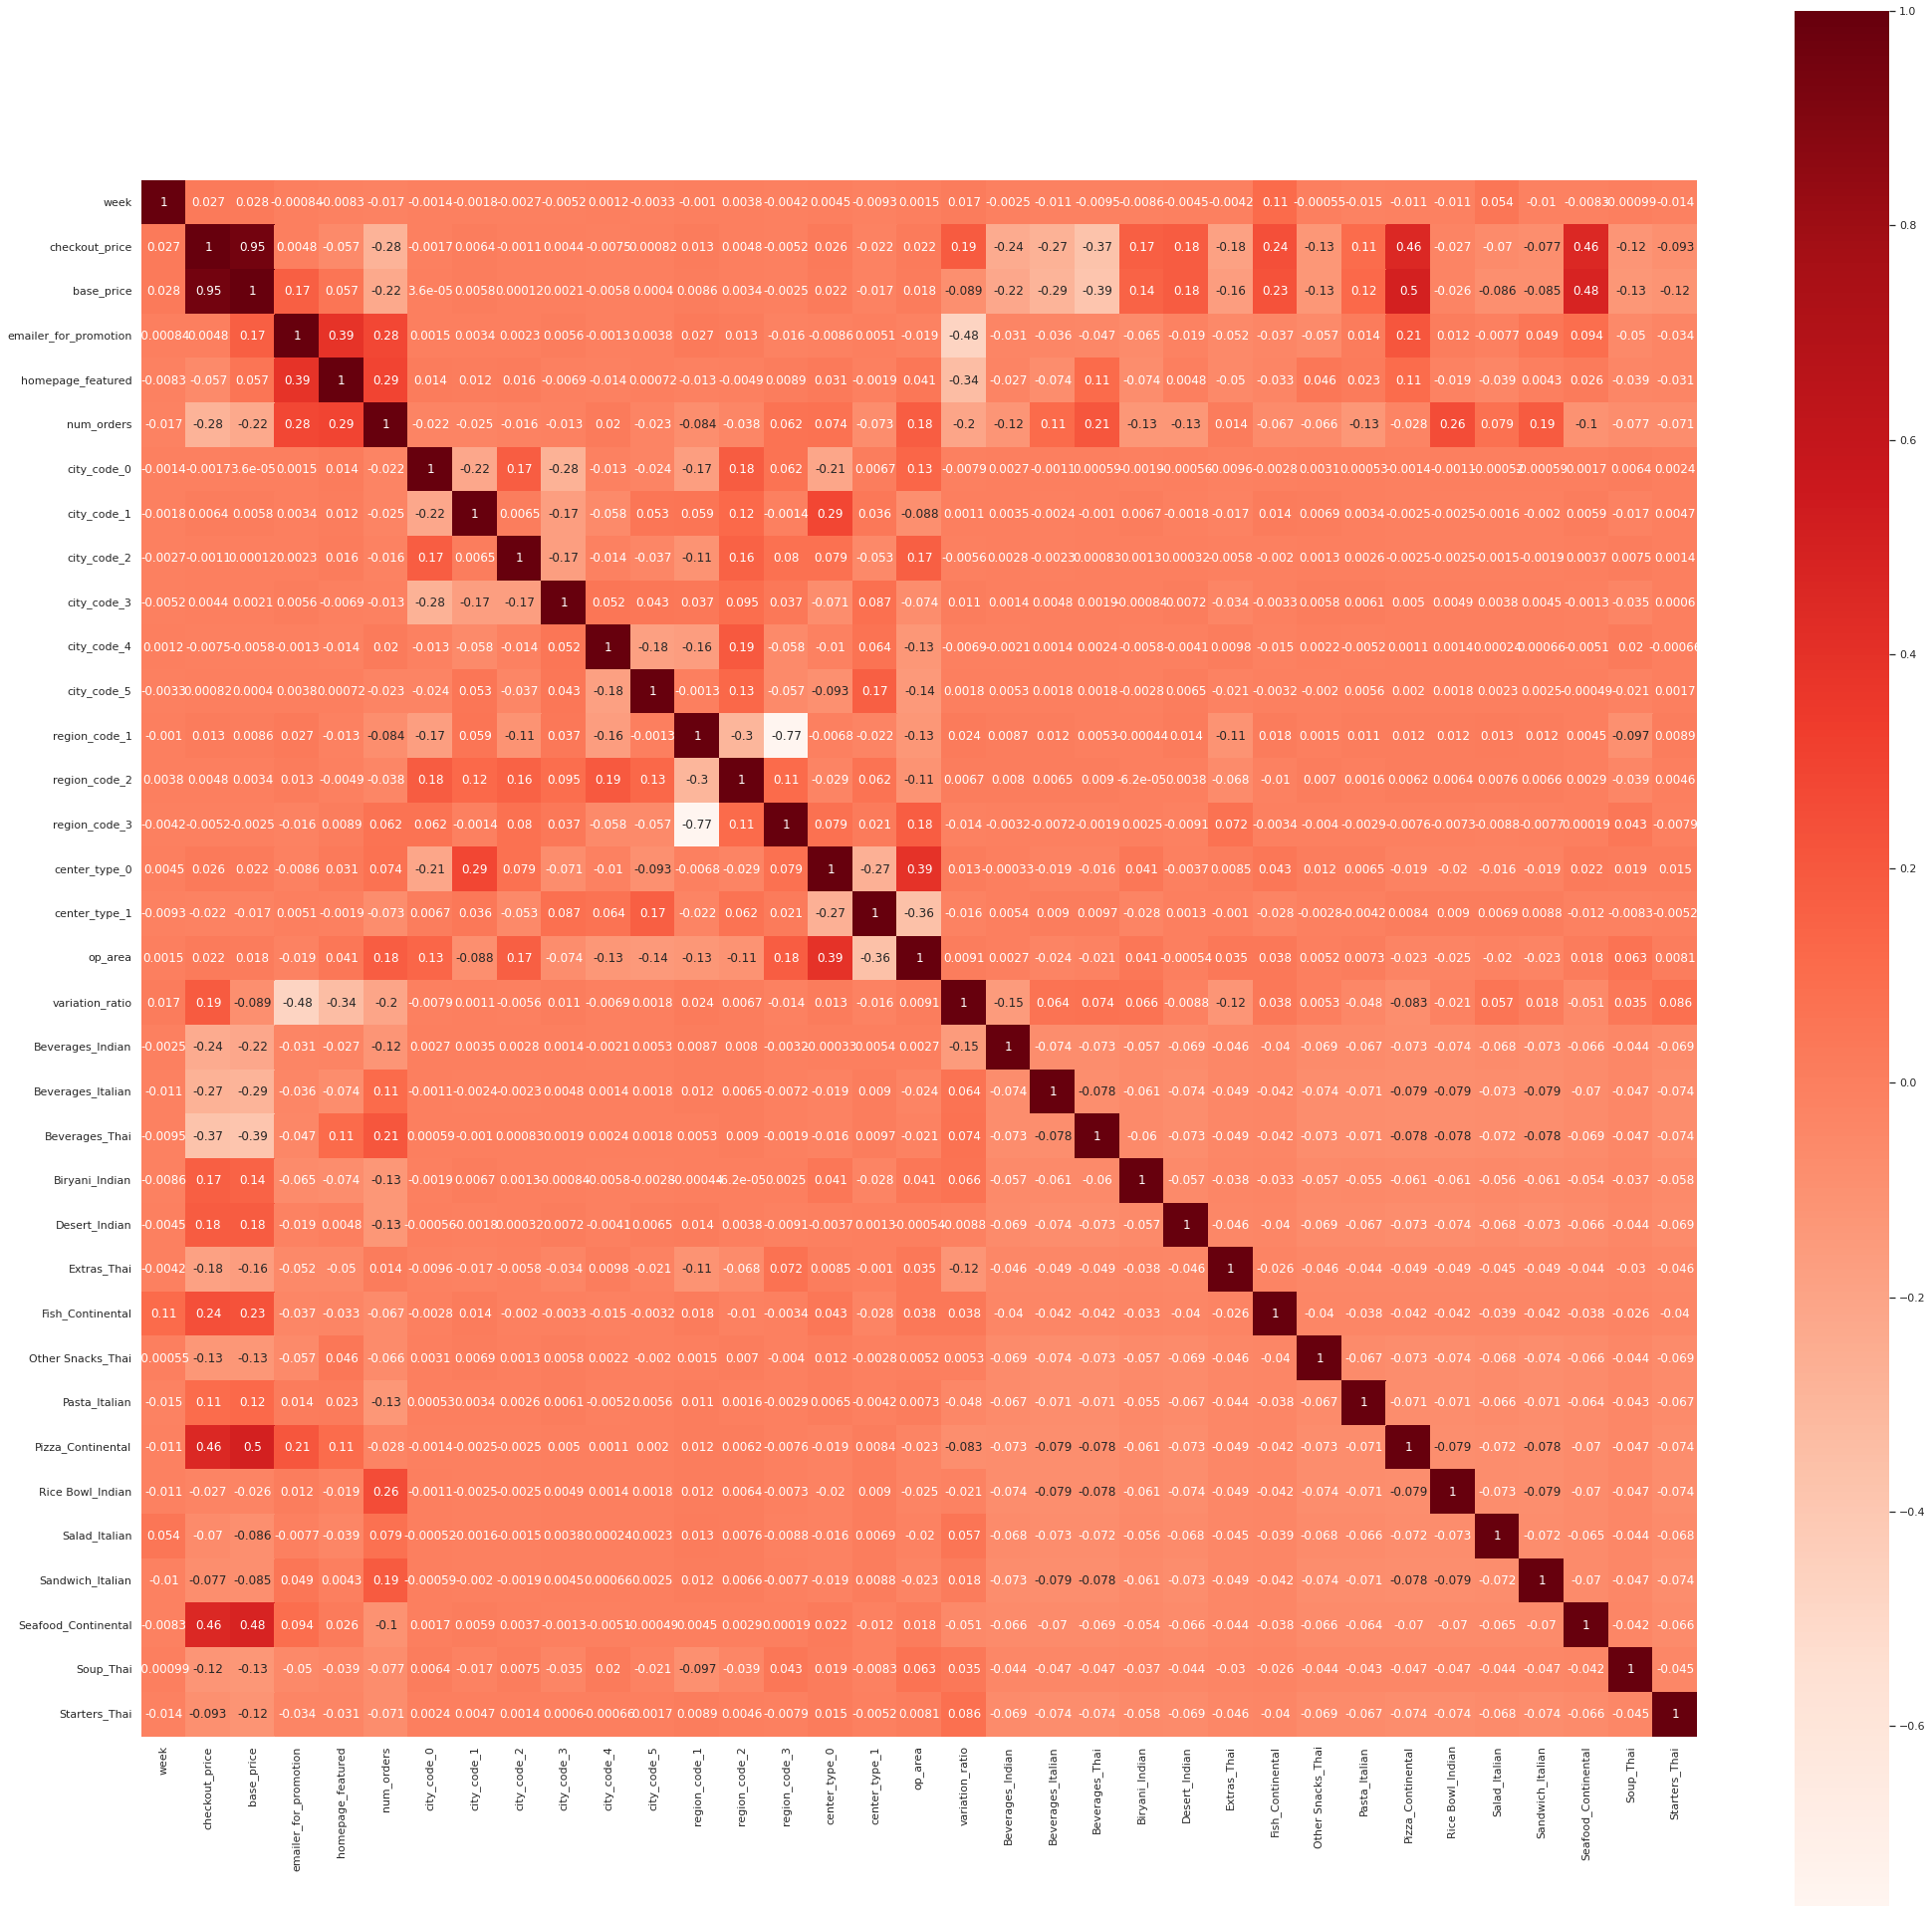

In [ ]:
sns.set(rc={'figure.figsize':(35,35)});
sns.heatmap(data_encoded.corr(),annot=True, square=True, cmap='Reds')

With respect to the correlation between the response variable and the attributes, we can notice that it's highly correlated to homepage_featured, followed by the checkout_price, and emailer_for_promotions. Then, these are followed by the rest of the categorical data that we previously encoded.

In [ ]:
abs(data_encoded.corr()['num_orders']).sort_values(ascending=False)

num_orders               1.000000
homepage_featured        0.294490
checkout_price           0.282108
emailer_for_promotion    0.277147
Rice Bowl_Indian         0.257584
base_price               0.222323
Beverages_Thai           0.207906
variation_ratio          0.204939
Sandwich_Italian         0.189771
op_area                  0.176976
Pasta_Italian            0.130124
Desert_Indian            0.129376
Biryani_Indian           0.126996
Beverages_Indian         0.120238
Beverages_Italian        0.110770
Seafood_Continental      0.101768
region_code_1            0.083541
Salad_Italian            0.079172
Soup_Thai                0.076762
center_type_0            0.073647
center_type_1            0.073322
Starters_Thai            0.071327
Fish_Continental         0.067262
Other Snacks_Thai        0.065998
region_code_3            0.062371
region_code_2            0.038251
Pizza_Continental        0.027597
city_code_1              0.024557
city_code_5              0.022902
city_code_0   

Also, because of colinearity with base price and checkout price, we shall eliminate the least correlated with #orders, namely the base price

In [ ]:
data_encoded=data_encoded.drop(['base_price'], axis=1)
data_encoded

,week,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,variation_ratio,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
0,1,136.83,0,0,177,0,0,0,0,0,1,0,0,1,0,1,2.0,-0.101517,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,136.83,0,0,270,0,0,0,0,0,1,0,0,1,0,1,2.0,0.007362,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,134.86,0,0,189,0,0,0,0,0,1,0,0,1,0,1,2.0,-0.007361,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,339.50,0,0,54,0,0,0,0,0,1,0,0,1,0,1,2.0,-0.224053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,243.50,0,0,40,0,0,0,0,0,1,0,0,1,0,1,2.0,0.004124,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,484.09,0,0,68,1,1,0,0,1,1,0,1,1,1,1,4.5,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456544,145,482.09,0,0,42,1,1,0,0,1,1,0,1,1,1,1,4.5,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456545,145,237.68,0,0,501,1,1,0,0,1,1,0,1,1,1,1,4.5,-0.259725,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456546,145,243.50,0,0,729,1,1,0,0,1,1,0,1,1,1,1,4.5,-0.222889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Now, let's split the attributes into two vectors, X and y so that we can feed the data to the sklearn model accordingly.


In [ ]:
X=data_encoded.drop(['num_orders','week'],axis=1)
y=data_encoded['num_orders']

Now, it's important to split the data into two subsets, one to be used in training to fit the model, and the other to test the accuracy of the model. The reason behind sperating them is that we don't want the model to cheat the answers in advance. The fancy word of the previous phenomena is over-fitting, which is basically when the curve we're trying to fit becomes too specific to the given data, which shall results in low performance when the model is given new data it hasn't seen before.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train

,checkout_price,emailer_for_promotion,homepage_featured,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,variation_ratio,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
160191,275.54,0,0,1,0,0,1,1,1,0,1,1,1,1,3.9,0.007312,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
359572,311.43,0,0,0,1,1,1,1,0,0,1,1,1,1,4.4,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
221087,612.13,0,0,1,0,1,1,1,1,0,1,0,0,1,2.8,0.001636,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
105384,254.20,0,0,0,1,0,1,0,1,0,0,1,1,1,3.9,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
423073,339.53,0,0,1,0,1,1,0,1,0,1,1,1,0,3.8,0.002954,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,231.86,0,0,0,0,0,1,1,0,0,0,1,1,1,3.8,-0.004294,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
365838,389.00,0,0,0,1,1,0,0,0,0,0,1,1,0,4.4,-0.191470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131932,141.62,0,1,0,0,0,0,0,1,0,0,1,1,1,4.5,0.167711,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
146867,445.23,0,0,0,1,1,0,1,1,0,1,0,1,1,4.5,-0.004472,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# **Predictive Analytics**

## Initial Predictive Analytics

### Linear Regression (Baseline)

We shall start by the most basic method used to prediction, which is multi linear regression. Simply put, as discussed in class, it tries to make a line of averages where each point on that line more or less represents the average given certain attributes. You can look at it as if it's an optimization porblem where the objective function is to minimize the error, namely the distance from the ground truth, given the trainable features. Upon training our initial regression model, it achieved an R^2 score of 0.43 and an RMSE equals to ~295. We will use these values to compare it to the scores of the other models we shall implement so that we can learn more about their effectiveness.

Note that the reg.score implicitly calculates the coefficient of determination R2, namely  the amount of the variation in the output dependent attribute, to assess the performance of a regressor. It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model. For more info, check out these links. 
* https://www.kaggle.com/getting-started/27261
* https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/


In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.4245102188985379
Test Score : 0.4314466252738345
R squared : 0.4314466252738345
RMSE : 294.92949974472623


### Random Forest Regressor

One of the most empirically proven to be very effective models when it comes to regression is the random forest regressor. But before we explain its algorithm, we first need to understand decision trees. 

Decision tree is a decision-making tool that uses a flowchart-like tree structure. Another valid definition is that it is a model of decisions and all of their possible results, including outcomes, input costs, and utility, where the nodes of the tree represent either the decision nodes or the end nodes, namely the results. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. For more info, check out these links.
* https://www.saedsayad.com/decision_tree_reg.htm
* https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/




What we want to focus on in our case study is not decision trees, but rather random forests. As the name indicates, a random forest regressor is more or less a set of decision trees created by randomly performing row sampling and feature sampling from the dataset forming sample datasets for every model. And sense every tree might have a high variance, a random forest regressor helps reduce this variance by using the decision trees to get the final decision collaboratively by taking the mean of the decision trees outputs, a technique called Bootstrap and Aggregation, commonly known as bagging. For more info, check out the following [link](https://www.geeksforgeeks.org/random-forest-regression-in-python/). 




In [ ]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train,y_train)
print('Train Score :',regr.score(X_train,y_train))
print('Test Score :',regr.score(X_test,y_test))

y_pred = regr.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.9454577008074709
Test Score : 0.7640243915010423
R squared : 0.7640243915010423
RMSE : 190.0054904661313


Since decision trees are more robust against nonlinearity and outliers than linear regressors, we can notice that it managed to achieve much higher results than the linear regression model.

### Gradient Boosting Regressor

We also wanted to try out another ensembling technique, namely the gradient boosting algorithm. It mainly involves three main elements. The first is to define a loss function to be optimize, which is similar to almost all supervised learning models. Secondly, it makes use of a set of weak learners, typically decision trees, by constructing them in a greedy manner, choosing the best split points based on purity scores to minimize the loss. After that, the model chooses the best weak learner sub-models that collaboratively minimize the loss function. From the results below, we can notice that it achieved a result that is worse than the random forest regressor yet still better than our baseline, namely the linear regressor. For more info, check out [this link](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/).

In [ ]:
regr = GradientBoostingRegressor(random_state=0)
regr.fit(X_train, y_train)

print('Train Score :',regr.score(X_train,y_train))
print('Test Score :',regr.score(X_test,y_test))

y_pred = regr.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.6365963906568305
Test Score : 0.6411035577799942
R squared : 0.6411035577799942
RMSE : 234.32421452369113


### Neural Network

Our 4th predictive model is a fully connected neural network. We chose neural networks as our 4th model because they can effectively solve any regression problem. Also, we had more than 300k training data points so we thought that this is enough for us to test whether a NN will have high results or not. We used mean square error as our loss function as we are solving a regression problem. Also, we used two hidden layers with 64 & 32 neurons as we wanted to have high data points per number of parameters ratio. We defined our evaluation metric to be root mean square error similar to the other models. 

In [ ]:
model = Sequential()
model.add(Dense(64, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(32, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

opt = Adam(learning_rate=3e-3, decay=1e-3 / 200)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=2048, validation_data=(X_test,y_test))

Epoch 1/150
168/168 [==============================] - 2s 8ms/step - loss: 187343.2812 - root_mean_squared_error: 432.8317 - val_loss: 154480.7344 - val_root_mean_squared_error: 393.0404
Epoch 2/150
168/168 [==============================] - 1s 6ms/step - loss: 119691.1406 - root_mean_squared_error: 345.9641 - val_loss: 93033.9062 - val_root_mean_squared_error: 305.0146
Epoch 3/150
168/168 [==============================] - 1s 5ms/step - loss: 84392.5703 - root_mean_squared_error: 290.5040 - val_loss: 71508.0156 - val_root_mean_squared_error: 267.4098
Epoch 4/150
168/168 [==============================] - 1s 6ms/step - loss: 71722.7188 - root_mean_squared_error: 267.8110 - val_loss: 65259.3125 - val_root_mean_squared_error: 255.4590
Epoch 5/150
168/168 [==============================] - 1s 6ms/step - loss: 67572.4531 - root_mean_squared_error: 259.9470 - val_loss: 63241.2617 - val_root_mean_squared_error: 251.4781
Epoch 6/150
168/168 [==============================] - 1s 5ms/step - los

## Handling Outliers

After looking at the boxplots, we found a few outliers in the checkout and base prices. So, we decided to use the interquartile range to find the outliers in the checkout prices. Also, since the variation ratio is defined from the base price and checkout price, we will remove the extreme outliers in that feature. The interquartile range is often used to find outliers in data. We removed the outliers using the following steps:

1.   Calculate the interquartile range for the data
2.   Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers)
3.   Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier
4.   Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier

In [ ]:
Q1 = data_encoded['variation_ratio'].quantile(0.25)
Q3 = data_encoded['variation_ratio'].quantile(0.75)
IQR = Q3 - Q1

filter = (data_encoded['variation_ratio'] >= Q1 - 3 * IQR) & (data_encoded['variation_ratio'] <= Q3 + 3 *IQR)
data_filtered = data_encoded.loc[filter]

In [ ]:
Q1 = data_filtered['checkout_price'].quantile(0.25)
Q3 = data_filtered['checkout_price'].quantile(0.75)
IQR = Q3 - Q1 

filter = (data_filtered['checkout_price'] >= Q1 - 1.5 * IQR) & (data_filtered['checkout_price'] <= Q3 + 1.5 *IQR)
data_filtered = data_filtered.loc[filter]

In [ ]:
print("Number of removed outliers: ", data_encoded.shape[0] - data_filtered.shape[0])

Number of removed outliers:  19215


## Predictive Models (2nd Trial)

After removing the outliers, we will run train our predictive models another time to test the effect of removing these outliers.

In [ ]:
X = data_filtered.drop(['num_orders', 'week'], axis=1)
y = data_filtered['num_orders']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train

,checkout_price,emailer_for_promotion,homepage_featured,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,op_area,variation_ratio,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
284140,280.36,0,0,0,1,0,1,0,1,0,0,1,1,1,4.0,0.003580,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
135877,178.54,0,0,1,1,0,0,0,0,1,0,0,1,1,4.8,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
353480,98.03,0,0,1,0,0,1,0,1,0,1,1,1,0,3.9,0.010306,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
134248,247.41,1,0,0,0,0,1,0,1,1,0,0,0,1,2.9,-0.114369,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
303715,290.03,0,0,0,0,0,1,1,0,0,0,1,0,1,0.9,-0.003436,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270868,295.88,0,0,0,1,0,0,0,1,0,0,1,1,0,4.4,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
381827,262.93,0,0,0,1,0,0,0,0,1,0,1,1,1,2.8,0.007665,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
137923,239.65,0,0,1,0,0,0,1,0,1,0,0,1,0,3.9,0.004190,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
153846,180.42,0,0,0,0,0,1,1,0,0,0,1,1,1,3.8,-0.005512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.46157545262833455
Test Score : 0.45874590694109685
R squared : 0.45874590694109685
RMSE : 253.07492789520745


### Random Forrest

In [ ]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train,y_train)
print('Train Score :',regr.score(X_train,y_train))
print('Test Score :',regr.score(X_test,y_test))

y_pred = regr.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.9337922042742199
Test Score : 0.7439801425059873
R squared : 0.7439801425059873
RMSE : 174.05453797002463


### Gradient Boosting

In [ ]:
regr = GradientBoostingRegressor(random_state=0)
regr.fit(X_train, y_train)

print('Train Score :',regr.score(X_train,y_train))
print('Test Score :',regr.score(X_test,y_test))

y_pred = regr.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.6212064397385726
Test Score : 0.6180547907175167
R squared : 0.6180547907175167
RMSE : 212.5930479793339


### Neural Network

In [ ]:
model = Sequential()
model.add(Dense(64, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(32, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

opt = Adam(learning_rate=3e-3, decay=1e-3 / 200)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=2048, validation_data=(X_test,y_test))

Epoch 1/150
161/161 [==============================] - 2s 7ms/step - loss: 143367.4219 - root_mean_squared_error: 378.6389 - val_loss: 136104.2969 - val_root_mean_squared_error: 368.9232
Epoch 2/150
161/161 [==============================] - 1s 6ms/step - loss: 95377.3281 - root_mean_squared_error: 308.8322 - val_loss: 77914.3594 - val_root_mean_squared_error: 279.1314
Epoch 3/150
161/161 [==============================] - 1s 6ms/step - loss: 64116.2305 - root_mean_squared_error: 253.2118 - val_loss: 58635.7305 - val_root_mean_squared_error: 242.1482
Epoch 4/150
161/161 [==============================] - 1s 6ms/step - loss: 52541.7500 - root_mean_squared_error: 229.2199 - val_loss: 51868.4453 - val_root_mean_squared_error: 227.7464
Epoch 5/150
161/161 [==============================] - 1s 6ms/step - loss: 48667.8945 - root_mean_squared_error: 220.6080 - val_loss: 49984.1875 - val_root_mean_squared_error: 223.5714
Epoch 6/150
161/161 [==============================] - 1s 6ms/step - loss

After running the same exact models after removing the outliers, all models increased their performance and this was expected as outliers generally tend predictive models.

## Standardizing Features

Next, we will standardize our numerical features and observe the effect on our model accuracies. Note that we only have

In [ ]:
sc=StandardScaler()
categorical_feat = X.drop(['checkout_price', 'variation_ratio', 'op_area'], axis=1)
numerical_feat = X[['checkout_price', 'variation_ratio', 'op_area']]
standardized = pd.DataFrame(sc.fit_transform(numerical_feat), columns=numerical_feat.columns)

categorical_feat = categorical_feat.reset_index(drop=True)
standardized = standardized.reset_index(drop=True)

X_std = pd.concat([standardized, categorical_feat], axis=1)
X_std

,checkout_price,variation_ratio,op_area,emailer_for_promotion,homepage_featured,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
0,-1.320847,-0.672734,-1.910685,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.320847,0.569872,-1.910685,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.333872,0.401846,-1.910685,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.019207,-2.071207,-1.910685,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.615545,0.532913,-1.910685,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437328,0.975235,0.485850,0.380024,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
437329,0.962011,0.485850,0.380024,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
437330,-0.654027,-2.478323,0.380024,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
437331,-0.615545,-2.057919,0.380024,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Applying Log to the Response Variable


We also log-transformed the dependent variable (num_of_orders) as it is a good practice to log-transform the response variable when it is constrained to be positive.

In [ ]:
y = y.reset_index(drop=True)
y_log = np.log(y)
y_log

0         5.176150
1         5.598422
2         5.241747
3         3.988984
4         3.688879
            ...   
437328    4.219508
437329    3.737670
437330    6.216606
437331    6.591674
437332    5.087596
Name: num_orders, Length: 437333, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_log, test_size=0.25, random_state=42)

In [ ]:
X_train

,checkout_price,variation_ratio,op_area,emailer_for_promotion,homepage_featured,city_code_0,city_code_1,city_code_2,city_code_3,city_code_4,city_code_5,region_code_1,region_code_2,region_code_3,center_type_0,center_type_1,Beverages_Indian,Beverages_Italian,Beverages_Thai,Biryani_Indian,Desert_Indian,Extras_Thai,Fish_Continental,Other Snacks_Thai,Pasta_Italian,Pizza_Continental,Rice Bowl_Indian,Salad_Italian,Sandwich_Italian,Seafood_Continental,Soup_Thai,Starters_Thai
271596,-0.371827,0.526703,-0.078118,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
129927,-1.045060,0.485850,0.654909,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
338279,-1.577392,0.603471,-0.169746,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
128327,-0.589692,-0.819407,-1.086030,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
290440,-0.307889,0.446635,-2.918597,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-0.269209,0.485850,0.288395,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
365838,-0.487074,0.573327,-1.177658,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
131932,-0.641001,0.533672,-0.169746,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
146867,-1.032630,0.422942,-0.261375,0,0,0,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Predictive Models (3rd Trial)


Now, let's train the models after standardizing the numerical features and log-transforming the response variable.

### Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))

Train Score : 0.6689850256532572
Test Score : 0.6705307019891369
R squared : 0.6705307019891369
RMSE : 234.17571881980626


### Random Forrest

In [ ]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train,y_train)
print('Train Score :',regr.score(X_train,y_train))
print('Test Score :',regr.score(X_test,y_test))

y_pred = regr.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))

Train Score : 0.8985176912692845
Test Score : 0.7684789556792035
R squared : 0.7684789556792035
RMSE : 175.7441868592798


### Gradient Boosting

In [ ]:
regr = GradientBoostingRegressor(random_state=0)
regr.fit(X_train, y_train)

print('Train Score :',regr.score(X_train,y_train))
print('Test Score :',regr.score(X_test,y_test))

y_pred = regr.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))

Train Score : 0.7005118290474637
Test Score : 0.6996908595315297
R squared : 0.6996908595315297
RMSE : 233.0849436968426


### Nerual Network

In [ ]:
model = Sequential()
model.add(Dense(64, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(32, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

opt = Adam(learning_rate=3e-3, decay=1e-3 / 200)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[RootMeanSquaredError()])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42) 

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=2048, validation_data=(X_test,y_test))

Epoch 1/150
161/161 [==============================] - 2s 7ms/step - loss: 123222.6797 - root_mean_squared_error: 351.0309 - val_loss: 81576.5859 - val_root_mean_squared_error: 285.6161
Epoch 2/150
161/161 [==============================] - 1s 6ms/step - loss: 63336.6484 - root_mean_squared_error: 251.6677 - val_loss: 56497.8359 - val_root_mean_squared_error: 237.6927
Epoch 3/150
161/161 [==============================] - 1s 6ms/step - loss: 50326.2109 - root_mean_squared_error: 224.3350 - val_loss: 50007.7969 - val_root_mean_squared_error: 223.6242
Epoch 4/150
161/161 [==============================] - 1s 6ms/step - loss: 47204.9688 - root_mean_squared_error: 217.2670 - val_loss: 48207.4883 - val_root_mean_squared_error: 219.5620
Epoch 5/150
161/161 [==============================] - 1s 6ms/step - loss: 46042.3633 - root_mean_squared_error: 214.5748 - val_loss: 47187.8828 - val_root_mean_squared_error: 217.2277
Epoch 6/150
161/161 [==============================] - 1s 6ms/step - loss:

After standardizing our numerical features, we observed that the models that are based on decision trees (random forests & gradient boosting) did not increase their performance. This is because these models are not sensitive to the magnitude of variables but rather compare the input values irrespective to its range or scale.

On the other hand, models that are based on solving a system of equations (linear regression & neural network) had a significant increase in their performance after standardizing the numerical variables.

## Time Series Model

The next model is a time series model that considers the number of orders at previous weeks for a center-meal combination to predict the future number of orders for the same center-meal combination. So, instead of looking at the dataset as a whole and using the features to predict the future number of orders, only the values of the numbers of orders at previous weeks are used to predict the future number of orders. We had to formulate a time series model for every center-meal combination and we averaged the RMSE from all the models to be able to compare it with other models.

In [ ]:
Xs = []
centers = data['center_id'].unique()
meals = data['meal_id'].unique()
for c in centers:
  for m in meals:
    Xs.append(data.loc[(data['meal_id'] == m)].loc[(data['center_id'] == c)]['num_orders'].to_list())

sum_rmse = 0
count_rmse = 0
for X in Xs:
  if len(X) >= 100:
    train, test = X[0:len(X)-30], X[len(X)-30:]
    autoreg = AutoReg(train, lags = 4)
    autoreg_fit = autoreg.fit()
    predictions = autoreg_fit.predict(start=len(train), end=len(train)+len(test)-1)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    sum_rmse += rmse
    count_rmse += 1

avg_rmse = sum_rmse / count_rmse
print('Average RMSE: %.3f' % avg_rmse)

Average RMSE: 153.312


The time series models achieved an average RMSE of 153.312. The problem with the time series models is that it a single model can only predict for a single center-meal combination. This led to the training set being constrained to a maximum of 145 training points, because the dataset is collected over 145 weeks, which even decreased more because we had to split into training and testing.

# **Optimization**

## Menu Optimization

Menu optimization is the problem of deciding which meals should be present on the menu of each center. Adding a meal to a menu is often associated with an overhead cost, e.g. the cost of buying new ingredients (especially if it is the only meal using this ingredient). On the other hand, adding a meal can increase the restaurant's profit through increasing the sales. So there lies the trade-off and we attempt to decide which meals should be present on the menu of the centers in order to increase the profit for the centers.

The objective function takes into consideration the profit generated through the meal and the overhead cost of including that meal in the menu.
The objective is to maximize the profit, and it is achieved through deciding which meals should be placed on the menu.

The following process should be applied at each center to decide on the menu at each center:

For a meal m, $X_{m}$ is a binary variable where $X_{m} = 0$ if m is not placed on the menu and $X_{m} = 1$ if m is placed on the menu.

For each meal m, $C_{m}$ is the proportion of the checkout price that includes the total cost (ingredients costs, preparation costs, etc) of preparing that meal. So, if a meal costs 60 and is sold at 100, $C_{m} = 60/100 = 0.6$. Therefore the revenue generated from selling that single meal = $(1 - C_{m})*CheckoutPrice_{m}$. Multiplying that by the number of orders gets us the total revenue from selling that meal. To get the total profit from that meal, we have to subtract the overhead cost of the meal, $O_{m}$, from the total revenue. So the total profit of one meal becomes $NumberOfOrders_{m}*(1 - C_{m})*CheckoutPrice_{m} - O_{m}$. Summing this over all the meals gets us the total profit at the center. Before summation, we multiply each term by $X_{m}$ so that the profit from the meal is added in the summation if the meal is on the menu, otherwise the profit is neglected. The optimizer is to decide whether the meal should be added to the menu based on the meal's contribution to the total profit. So the final objective function becomes $f(X_{1},X_{2},...,X_{n}) = \sum_{m=1}^n ( X_{m}*NumberOfOrders_{m}*(1 - C_{m})*CheckoutPrice_{m} - X_{m}*O_{m})$. The objective function resembles the total profit and the objective is to maximize it. $NumberOfOrders_{m}$ should be given as an output from the chosen predictive model while $O_{m}$ and $C_{m}$ should be given as data about the meals. In our dataset, $O_{m}$ and $C_{m}$ were not given so we assumed values for them.

We will try the optimizer for the menu at center 55.

In [ ]:
import gurobipy as gp
from gurobipy import GRB

meal_opt = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Mohamed Barakat - 900171290/DIY Project/Dataset/meal_info_opt.csv")

try:
    # Create a new model
    m = gp.Model("Menu")

    # Create variables
    x = []
    meal_ids = data[data['center_id'] == 55][data['week'] == 144]['meal_id'].to_list()
    name = [str(id) for id in meal_ids]
    for i in range(len(meal_ids)):
      x.append(m.addVar(vtype=GRB.BINARY, name = name[i]))

    n = data[data['center_id'] == 55][data['week'] == 144]['num_orders'].to_list()
    p = data[data['center_id'] == 55][data['week'] == 144]['checkout_price'].to_list()
    p_c = []
    o = []
    for mi in meal_ids:
      p_c.append(1 - meal_opt[meal_opt['meal_id'] == mi]['cost_portion'].iloc[0])
      o.append(meal_opt[meal_opt['meal_id'] == mi]['overhead'].iloc[0])

    # Set objective
    expr = x[0]*n[0]*p_c[0]*p[0] - x[0]*o[0]
    for i in range(1,len(x)):
      expr += x[i]*n[i]*p_c[i]*p[i] - x[i]*o[i]
    m.setObjective(expr, GRB.MAXIMIZE)

    # Optimize model
    m.optimize()

    for v in m.getVars():
        print('%s: %g' % (v.varName, v.x))

    print('Obj: %g' % m.objVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 0 rows, 38 columns and 0 nonzeros
Model fingerprint: 0xbc2d64c8
Variable types: 0 continuous, 38 integer (38 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [8e+01, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 916867.25800

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 916867 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.168672580000e+05, best bound 9.168672580000e+05, gap 0.0000%
1885: 1
1993: 1
2539: 1
2139: 1
2631: 1
1248: 1
1778: 1
1062: 1
2707: 1
1207: 1
1230: 1
2322: 1
2290: 1
1727: 1
1109: 1
1571: 1
2956: 1
2640: -0
1878: -0
2826: 1
1754: 1
1971: 1
1198: -0
1311: 1
1803: 1
1558: 1
2581: 1
1962: 1
1445: 1
2444: 1
2867

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


From the output of the optimizer, we understand that the menu at center 55 should include the meals with 1 next to their meal id and remove the meals with 0 next to their meal id in order to maximize the profit at center 55.

## Inventory Optimization

We believe that our prediction model can be further used to solve other optimization problem. For the purpose of this project, we only implemented the above algorithm. However, future works may include ideas like trying to optimize the food inventory management, namely when to order the raw materials and the optimal ordered quantities of each ingredient.

In this case, the objective function shall be maximizing the quantities we request per order (or minimizing the total number of orders per year to save the overhead costs), subject to and taking into consideration:
* How long each ingredient can be used before getting spoiled.
* The capacity of the truck used for ordering.
* The capacity of the restaurant food storage.

The reason why we were unable to implement this idea is that we don't have info about the ingredients of each meal. Future works may include augmenting this data with more data about the meals and the portion of each ingredient. Then, we'll be able to predict the total amount of ingredients needed for each center to operate.

# **Conclusion**

Throughout the notebook, we were working on our dataset and preparing it to be used for predicting the number of orders of meals at a restaurant. Using the predictions, we can have a good guess about the quantities of ingredients needed for a certain period of time. If the predictions were accurate, the restaurants will not have a significant amount of food wasted and we would then achieve our goal of reducing food waste.

We also formulated an optimization problem to decide which meals should be placed on the menu of the restaurant. When this optimization problem is solved, it should help restaurants in maximizing their profits.

Food waste reduction, demand prediction and menu optimization remain to be topics of research where many efforts are put. We hope our contribution is meaningful to these research areas and that our work throughout the notebook was useful and easy to understand.